# KNN Assignment

*Prafful Agrawal*  
*15/02/2021*

### Problem Statement

Build a regression model using the *K-Nearest Neighbours* algorithm to predict the number of points NBA players scored in the 2013-2014 season.

### Solution

The analysis has been divided into the following steps:

1. Data Import
2. Exploratory Data Analysis
3. Data Preprocessing and Transformation
4. Model Development
5. Model Selection and Verification
6. Conclusion

Let us import the required packages.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

Now, load the *NBA Data* as a Pandas Dataframe.

In [2]:
with open('nba_2013.csv', 'r') as csvfile :
    nba_data = pd.read_csv(csvfile)
nba_data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


The shape of the data is:

In [3]:
nba_data.shape

(481, 31)

There are 31 variables and 481 observations.

The variables are as follows:

In [4]:
nba_data.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

The description of the variables is given below:

| Variable       | Description                      |
| -------------: | :------------------------------- |
| `player`       | Player's name                    |
| `pos`          | Position played                  |
| `age`          | Player's Age                     |
| `bref_team_id` | Team ID                          |
| `g`            | Games played                     |
| `gs`           | Games started                    |
| `mp`           | Minutes played                   |
| `fg`           | Field Goals                      |
| `fga`          | Field Goals Attempts             |
| `fg.`          | Field Goals Percentage           |
| `x3p`          | 3-point Field Goals              |
| `x3pa`         | 3-point Field Goals Attempts     |
| `x3p.`         | 3-point Field Goals Percentage   |
| `x2p`          | 2-point Field Goals              |
| `x2pa`         | 2-point Field Goals Attempts     |
| `x2p.`         | 2-point Field Goals Percentage   |
| `efg.`         | Effective Field Goals Percentage |
| `ft`           | Free Throws                      |
| `fta`          | Free Throws Attempts             |
| `ft.`          | Free Throws Percentage           |
| `orb`          | Offensive Rebounds               |
| `drb`          | Defensive Rebounds               |
| `trb`          | Total Rebounds                   |
| `ast`          | Assists                          |
| `stl`          | Steals                           |
| `blk`          | Blocks                           |
| `tov`          | Turnovers                        |
| `pf`           | Personal Fouls                   |
| `pts`          | Points                           |
| `season`       | Season                           |
| `season-end`   | Season end                       |

Out of these, the variables `player`, `pos`, `bref_team_id`, `season` and `season_end` are not helpful for regression and hence, will be dropped.

In [5]:
data = nba_data.drop(columns = ['player', 'pos', 'bref_team_id', 'season', 'season_end'])
data.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,0.660,72,144,216,28,23,26,30,122,171
1,20,81,20,1197,93,185,0.503,0,0,NaN,...,0.581,142,190,332,43,40,57,71,203,265
2,27,53,12,961,143,275,0.520,0,0,NaN,...,0.639,102,204,306,38,24,36,39,108,362
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,0.815,32,230,262,248,35,3,146,136,1330
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,0.836,94,183,277,40,23,46,63,187,328


Many of the given variables are combination of other variables.

For example, `x3p.` is the ratio of `x3p` and `x3pa`. Similarly, we have other variables that are also ratios.

And, since the ratio captures the entire information with lower number of variables, we will only keep the ratios (i.e. `x3p.`, etc.) and drop the individual variables (i.e. `x3p` and `x3pa`, etc.). This will help eliminate the correlation in the data and also reduce the dimensionality.

In [6]:
data = data.drop(columns = ['fg', 'fga', 'x3p', 'x3pa', 'x2p', 'x2pa', 'ft', 'fta'])
data.head()

,age,g,gs,mp,fg.,x3p.,x2p.,efg.,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,23,63,0,847,0.468,0.266667,0.492063,0.482,0.660,72,144,216,28,23,26,30,122,171
1,20,81,20,1197,0.503,NaN,0.502703,0.503,0.581,142,190,332,43,40,57,71,203,265
2,27,53,12,961,0.520,NaN,0.520000,0.520,0.639,102,204,306,38,24,36,39,108,362
3,28,73,73,2552,0.459,0.426667,0.472574,0.522,0.815,32,230,262,248,35,3,146,136,1330
4,25,56,30,951,0.546,0.000000,0.548387,0.546,0.836,94,183,277,40,23,46,63,187,328


Again, we have variables `fg.`, `efg.` and `trb` which are now redundant and hence, will be dropped.

In [7]:
data = data.drop(columns = ['fg.', 'efg.', 'trb'])
data.head()

,age,g,gs,mp,x3p.,x2p.,ft.,orb,drb,ast,stl,blk,tov,pf,pts
0,23,63,0,847,0.266667,0.492063,0.660,72,144,28,23,26,30,122,171
1,20,81,20,1197,NaN,0.502703,0.581,142,190,43,40,57,71,203,265
2,27,53,12,961,NaN,0.520000,0.639,102,204,38,24,36,39,108,362
3,28,73,73,2552,0.426667,0.472574,0.815,32,230,248,35,3,146,136,1330
4,25,56,30,951,0.000000,0.548387,0.836,94,183,40,23,46,63,187,328


Let us check for missing values.

In [8]:
data.isna().sum()

age      0
g        0
gs       0
mp       0
x3p.    67
x2p.     3
ft.     20
orb      0
drb      0
ast      0
stl      0
blk      0
tov      0
pf       0
pts      0
dtype: int64

It seems that there are missing values in the `x3p.`, `x2p.` and `ft.` variables.

These variables are ratios and the missing values are due to *division by zero*. Hence, we will replace the missing values with Zero.

In [9]:
data = data.replace(np.nan, 0)
data.head()

,age,g,gs,mp,x3p.,x2p.,ft.,orb,drb,ast,stl,blk,tov,pf,pts
0,23,63,0,847,0.266667,0.492063,0.660,72,144,28,23,26,30,122,171
1,20,81,20,1197,0.000000,0.502703,0.581,142,190,43,40,57,71,203,265
2,27,53,12,961,0.000000,0.520000,0.639,102,204,38,24,36,39,108,362
3,28,73,73,2552,0.426667,0.472574,0.815,32,230,248,35,3,146,136,1330
4,25,56,30,951,0.000000,0.548387,0.836,94,183,40,23,46,63,187,328


Check the shape of the data:

In [10]:
data.shape

(481, 15)

Here, we have 14 independent variables which will be used to predict the dependent variable `pts`.

Let us look at the distribution of data:

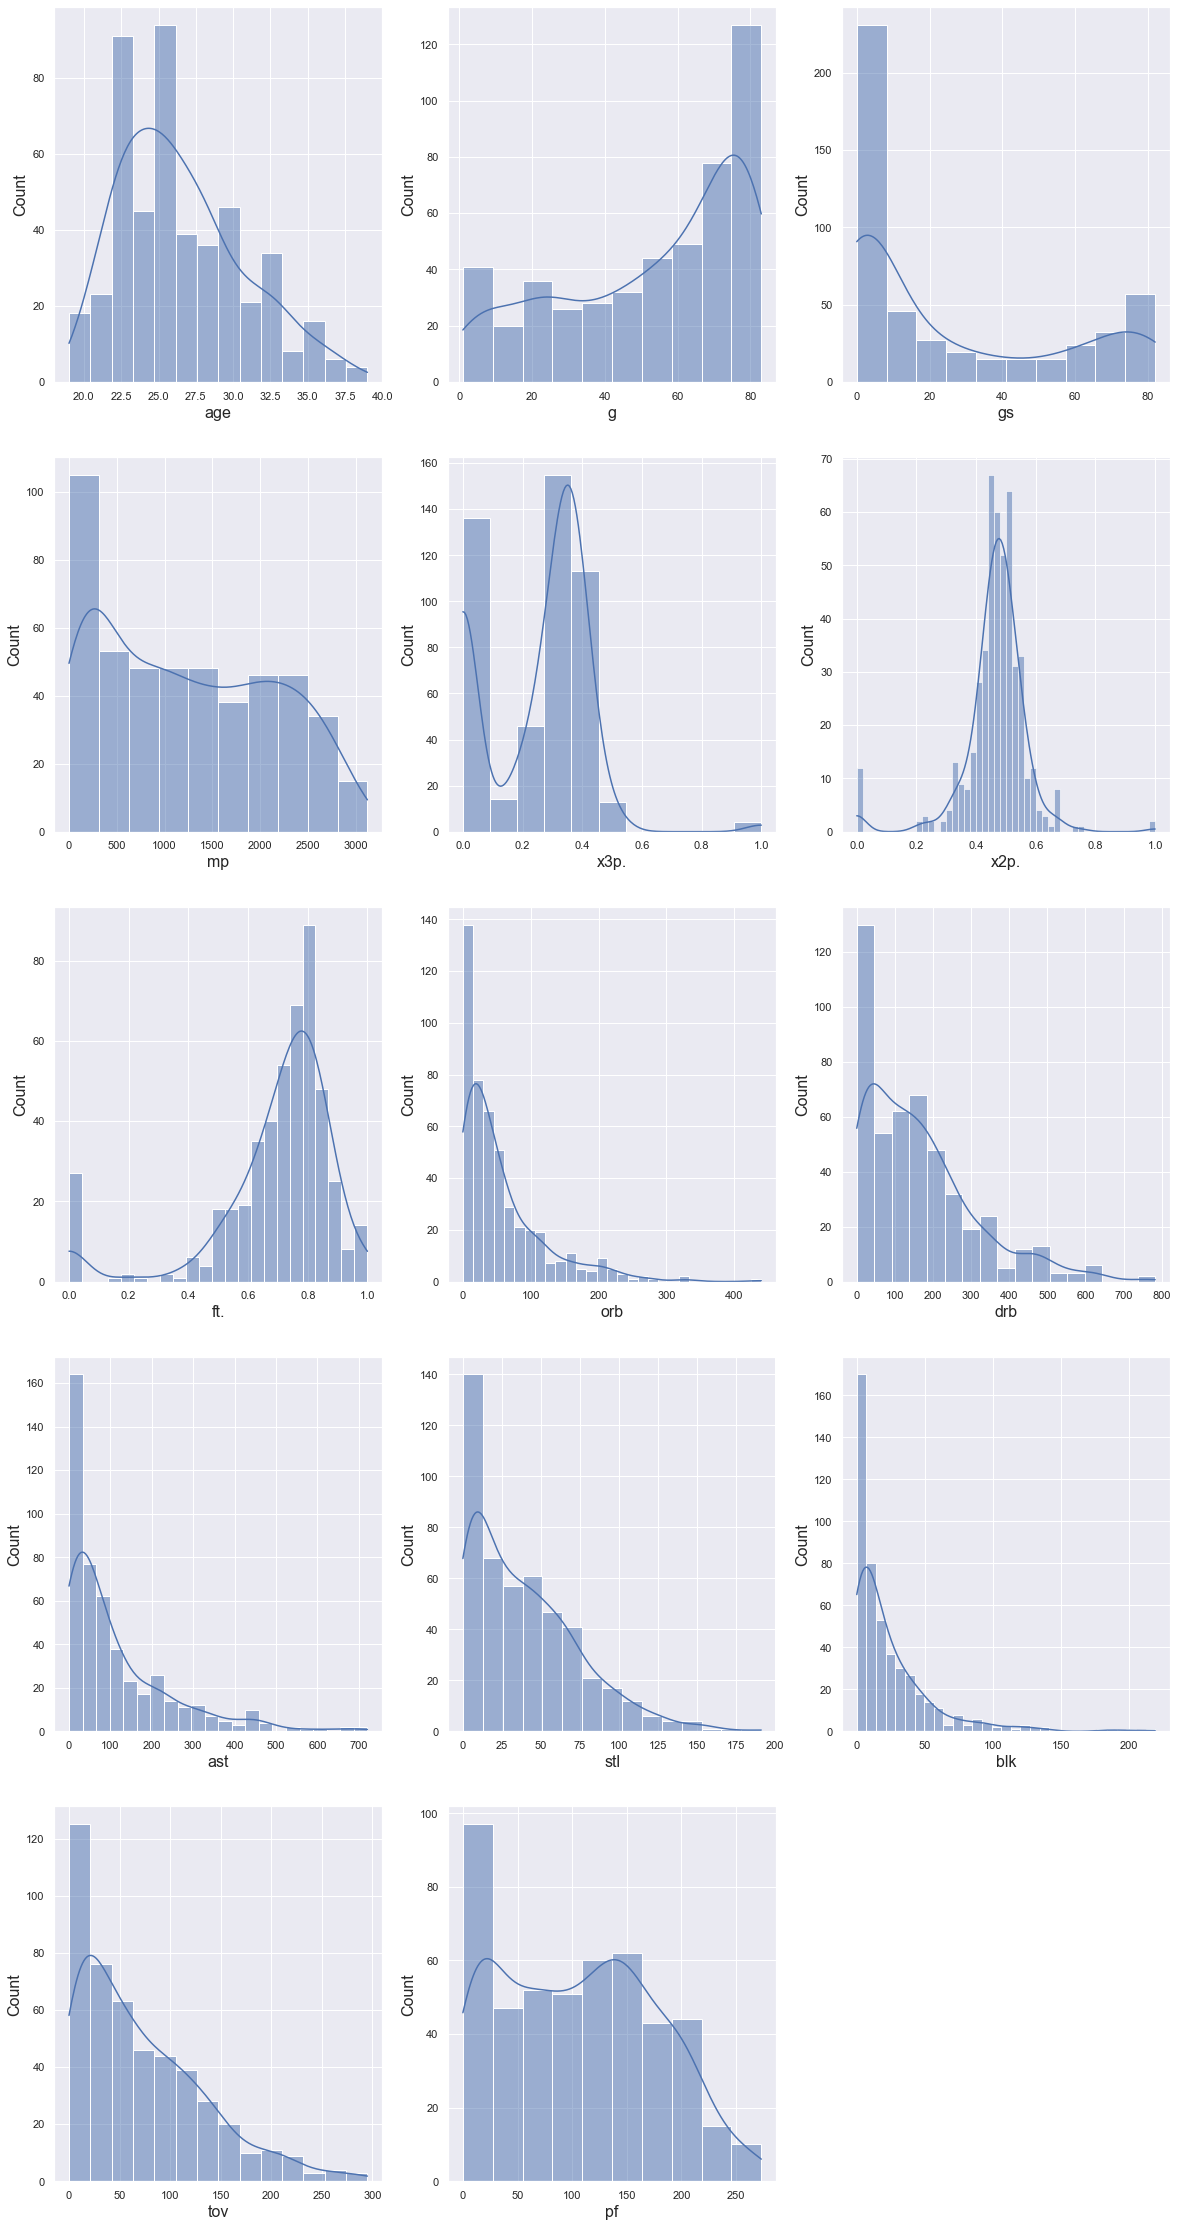

In [11]:
plt.figure(figsize = (20, 40))
plotnumber = 1
for column in data.columns[:-1]:
    ax = plt.subplot(5, 3, plotnumber)
    sns.histplot(data = data[column], stat = 'count', kde = True)
    plt.xlabel(column, fontsize = 16)
    plt.ylabel('Count', fontsize = 16)
    plotnumber += 1
plt.show()

Multiple variables show considerable skewness. We can transform these to reduce their skewness.

We will replace the variables `gs`, `orb`, `drb`, `ast`, `stl`, `blk` and `tov` with thier *square roots*. While, for the variable `age`, we will use its *logarithms*.

In [12]:
data_trans = data.copy()
sqrt_columns = ['gs', 'orb', 'drb', 'ast', 'stl', 'blk', 'tov']
data_trans[sqrt_columns] = np.sqrt(data[sqrt_columns])
data_trans['age'] = np.log(data['age'])
data_trans.head()

,age,g,gs,mp,x3p.,x2p.,ft.,orb,drb,ast,stl,blk,tov,pf,pts
0,3.135494,63,0.000000,847,0.266667,0.492063,0.660,8.485281,12.000000,5.291503,4.795832,5.099020,5.477226,122,171
1,2.995732,81,4.472136,1197,0.000000,0.502703,0.581,11.916375,13.784049,6.557439,6.324555,7.549834,8.426150,203,265
2,3.295837,53,3.464102,961,0.000000,0.520000,0.639,10.099505,14.282857,6.164414,4.898979,6.000000,6.244998,108,362
3,3.332205,73,8.544004,2552,0.426667,0.472574,0.815,5.656854,15.165751,15.748016,5.916080,1.732051,12.083046,136,1330
4,3.218876,56,5.477226,951,0.000000,0.548387,0.836,9.695360,13.527749,6.324555,4.795832,6.782330,7.937254,187,328


Again, look at the distribution of the transformed variables.

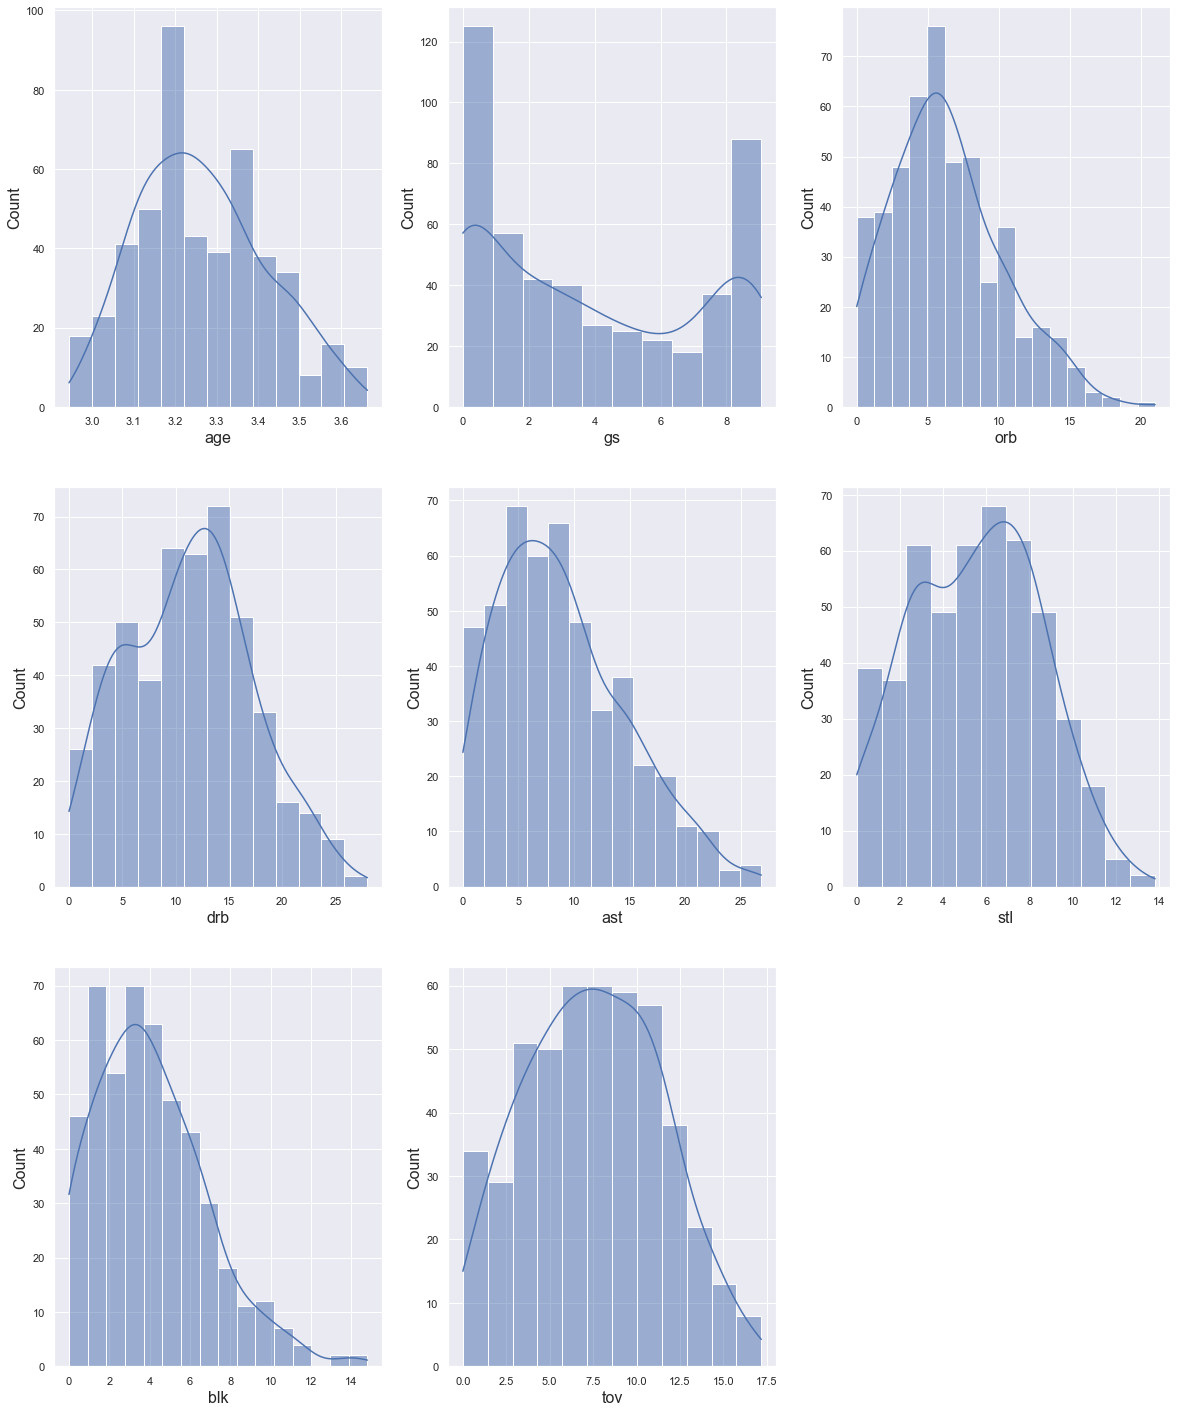

In [13]:
plt.figure(figsize = (20, 25))
plotnumber = 1
for column in ['age', 'gs', 'orb', 'drb', 'ast', 'stl', 'blk', 'tov']:
    ax = plt.subplot(3, 3, plotnumber)
    sns.histplot(data = data_trans[column], stat = 'count', kde = True)
    plt.xlabel(column, fontsize = 16)
    plt.ylabel('Count', fontsize = 16)
    plotnumber += 1
plt.show()

There are some improvements in the above distributions.

Let us now check for outliers in our data using boxplots.

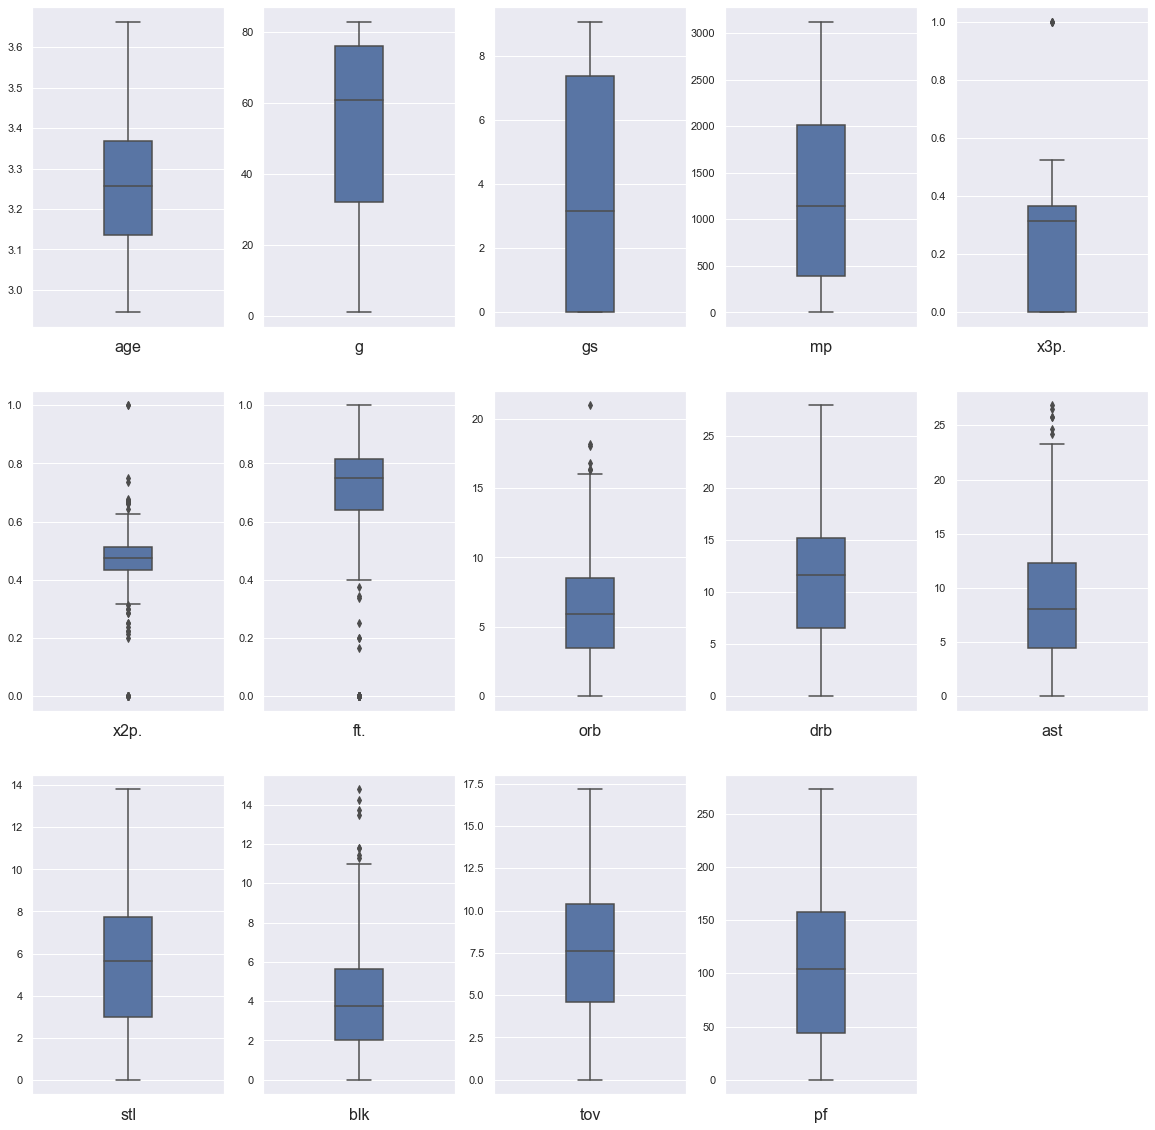

In [14]:
plt.figure(figsize = (20, 20))
plotnumber = 1
for column in data_trans.columns[:-1]:
    ax = plt.subplot(3, 5, plotnumber)
    sns.boxplot(y = data_trans[column], width = 0.25)
    plt.xlabel(column, fontsize = 16)
    plt.ylabel('')
    plotnumber += 1
plt.show()

Many of the given variables suffer from outliers.

We can calculate the number of outliers per column using the Inter-Quartile Range (IQR) as follows:

In [15]:
dt_q25 = data_trans.quantile(0.25)
dt_q75 = data_trans.quantile(0.75)
IQR = dt_q75 - dt_q25
is_Outlier = (data_trans < (dt_q25 - 1.5 * IQR)) | (data_trans > (dt_q75 + 1.5 * IQR))
is_Outlier = is_Outlier.drop(columns = 'pts')
num_Outliers = is_Outlier.sum()
num_Outliers

age      0
g        0
gs       0
mp       0
x3p.     4
x2p.    37
ft.     34
orb      6
drb      0
ast      6
stl      0
blk      8
tov      0
pf       0
dtype: int64

From above, we can observe that out of 14 variables, 6 have outliers. The variable `x2p.` has the most outliers, closely followed by `ft.` and then the rest.

After consideration, we have decided to remove the observations having outliers in any of their column.

In [16]:
data_out_rem = data_trans.copy()
data_out_rem = data_out_rem[~is_Outlier.any(axis = 1)]
data_out_rem.head()

,age,g,gs,mp,x3p.,x2p.,ft.,orb,drb,ast,stl,blk,tov,pf,pts
0,3.135494,63,0.000000,847,0.266667,0.492063,0.660,8.485281,12.000000,5.291503,4.795832,5.099020,5.477226,122,171
1,2.995732,81,4.472136,1197,0.000000,0.502703,0.581,11.916375,13.784049,6.557439,6.324555,7.549834,8.426150,203,265
2,3.295837,53,3.464102,961,0.000000,0.520000,0.639,10.099505,14.282857,6.164414,4.898979,6.000000,6.244998,108,362
3,3.332205,73,8.544004,2552,0.426667,0.472574,0.815,5.656854,15.165751,15.748016,5.916080,1.732051,12.083046,136,1330
4,3.218876,56,5.477226,951,0.000000,0.548387,0.836,9.695360,13.527749,6.324555,4.795832,6.782330,7.937254,187,328


In [17]:
print('Number of rows remaining:', data_out_rem.shape[0])
print('Number of rows dropped:', data_trans.shape[0] - data_out_rem.shape[0])

Number of rows remaining: 409
Number of rows dropped: 72


We have **409 rows** remaining and have dropped a total of **72 rows**.

Let us look at the relationship between the dependent and independent variables.

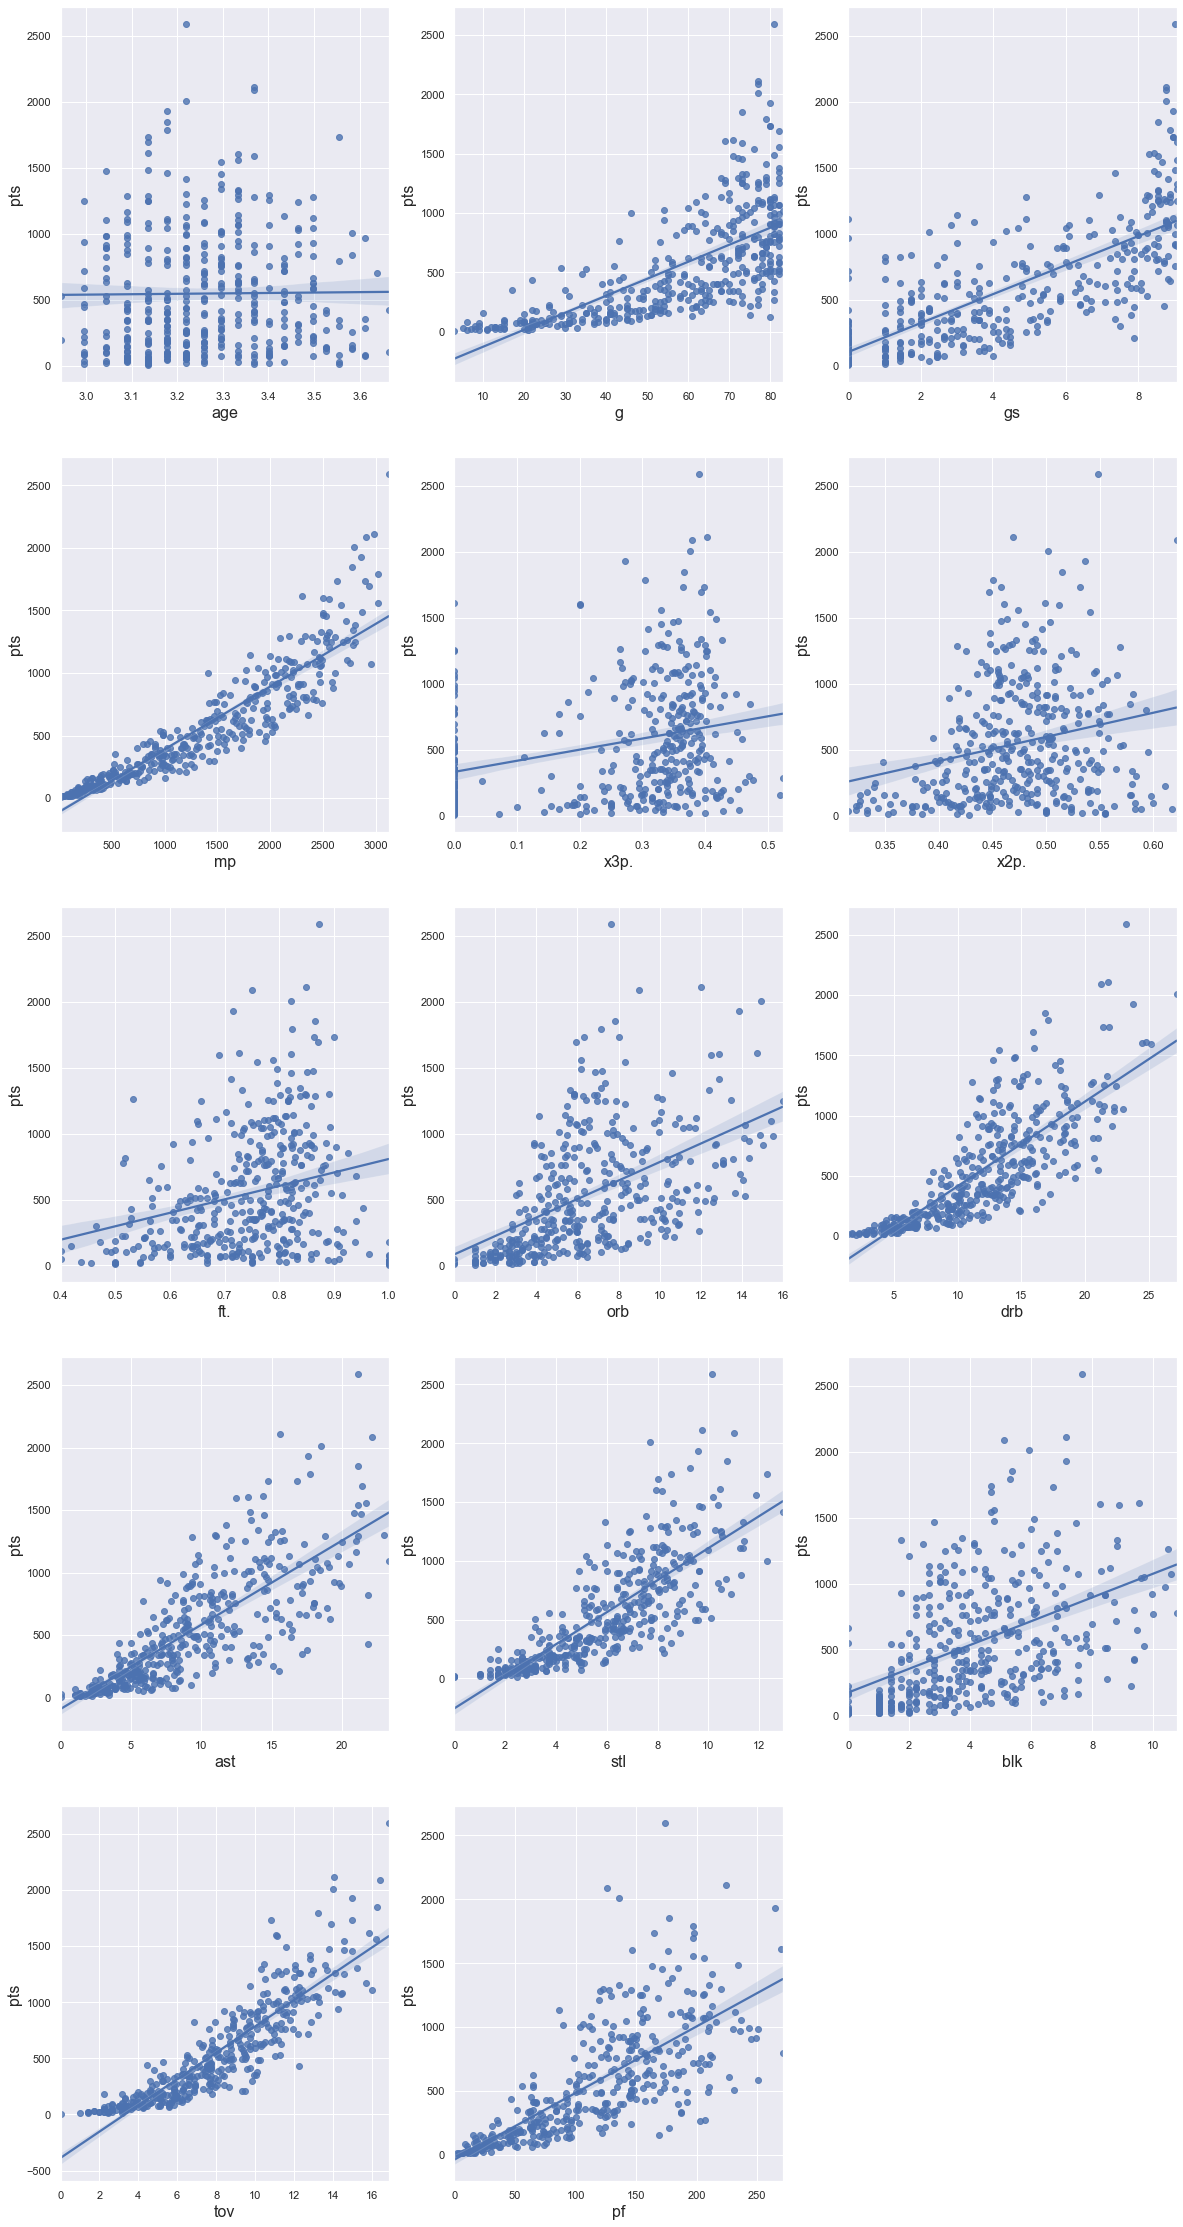

In [18]:
plt.figure(figsize = (20, 40))
plotnumber = 1
for column in data_out_rem.columns[:-1]:
    ax = plt.subplot(5, 3, plotnumber)
    sns.regplot(x = data_out_rem[column], y = data_out_rem['pts'])
    plt.xlabel(column, fontsize = 16)
    plt.ylabel('pts', fontsize = 16)
    plotnumber += 1
plt.show()

Multiple variables show a linear relationship with the dependent variable.

Now, let us check for multicollinearity between the independent variables. For this, we can either use the Variance Inflation Factor (VIF) or the Correlation Matrix. We will first calculate VIF.

In [19]:
scaler = StandardScaler()
variables = scaler.fit_transform(data_out_rem.drop(columns = 'pts'))
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif['Features'] = data_out_rem.columns[:-1]
vif

,VIF,Features
0,1.074616,age
1,5.399602,g
2,4.929057,gs
3,19.498278,mp
4,2.283211,x3p.
5,1.280622,x2p.
6,1.367103,ft.
7,7.665085,orb
8,12.947661,drb
9,9.352114,ast


A large number of variables have VIF above the threshold value of 5.

We proceed to construct the Correlation Matrix.

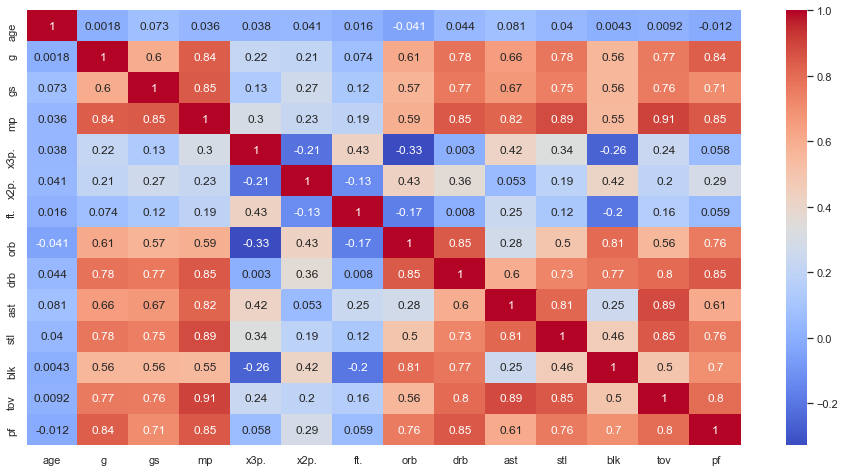

In [20]:
plt.figure(figsize = (16, 8))
sns.heatmap(data_out_rem.drop(columns = 'pts').corr(), annot = True, cmap = 'coolwarm')
plt.show()

Again, correlation between many variables is high (above 0.8). This *confirms* multicollinearity.

Now, to remedy this, we proceed with *Principal Component Analysis*.

In [21]:
X = data_out_rem.drop(columns = 'pts')
y = data_out_rem['pts']

First, transform the data using `StandardScaler`.

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.84077246,  0.27277443, -1.27233367, ...,  0.39704903,
        -0.7282355 ,  0.15714775],
       [-1.74564461,  1.09714445,  0.13760999, ...,  1.42642206,
         0.12784662,  1.41436767],
       [ 0.19734705, -0.18520891, -0.180196  , ...,  0.77547214,
        -0.50534871, -0.06014952],
       ...,
       [-0.3009281 ,  1.00554778,  1.51208197, ...,  0.77547214,
         1.41072047,  1.56958001],
       [-1.42975846,  1.14294279, -0.72626484, ...,  0.94478938,
         0.38947635,  0.90216696],
       [-0.56522527,  0.59336277, -0.32651471, ...,  0.84452809,
        -0.0696127 ,  0.38996625]])

Next, carry out PCA over the transformed data.

In [23]:
pca = PCA(random_state = 123)
pca.fit(X_scaled)

PCA(random_state=123)

We will pick the number of components which are able to explain atleast 90% of the variance in our data. 

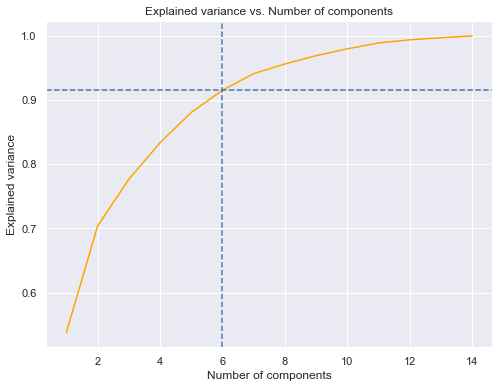

In [24]:
exp_var = pca.explained_variance_ratio_.cumsum()
num_comp = np.where(exp_var > 0.9)[0][0] + 1

# Plot the Explained variance with respect to the Number of components
plt.figure(figsize = (8, 6))
plt.plot(range(1, pca.n_components_ + 1), exp_var, color = 'orange')
plt.axhline(y = exp_var[num_comp-1], linestyle = '--')
plt.axvline(x = num_comp, linestyle = '--')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Explained variance vs. Number of components')
plt.show()

As observed, just *Six principal components* are able to capture about 90% of the data variance.

We will use this to transform our data.

In [25]:
pca_6 = PCA(n_components = num_comp, random_state = 123)
X_pca = pca_6.fit_transform(X_scaled)
X_pca

array([[ 7.84591321e-01,  1.27309635e+00, -8.94049494e-01,
         4.50334862e-03,  2.62570527e-01,  1.36171278e+00],
       [-1.57104891e+00,  3.04715878e+00, -1.82195748e+00,
        -4.92818280e-01, -6.38465507e-02,  3.76286890e-01],
       [ 1.36034953e-01,  2.62263327e+00,  3.27762782e-01,
         3.52720426e-02, -1.69724509e-01, -1.88958051e-01],
       ...,
       [-4.59475412e+00,  1.30332167e-01, -3.93073954e-01,
        -3.72874741e-01,  3.16877137e-01, -1.04976656e-01],
       [-1.27142261e+00,  1.58409754e+00, -1.80324915e+00,
        -6.71423643e-01, -1.30449088e+00,  2.34638972e-01],
       [-3.26496940e-01,  2.46998708e+00, -4.76879508e-01,
         7.50283113e-01, -2.91683788e-01,  1.18907153e-01]])

Now, we will proceed with model development.

First, let us split the data into the training and testing set.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.25, random_state = 123)

Fit a KNN regressor.

In [27]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

The $R^2$ score of the model is:

In [28]:
knn.score(X_test, y_test)

0.7433644470902429

Now, let us try to tune some hyper-parameters using the `GridSearchCV` algorithm.

We will tune the given 4 hyper-parameters:

1. `n_neighbors` - number of neighbors to use
2. `weights` - weight function used in prediction
3. `algorithm` - algorithm used to compute the nearest neighbors
4. `p` - power parameter for the Minkowski metric; when *p = 1*, it is equivalent to `manhattan_distance`, and for *p = 2*, it is the `euclidean_distance`.

We will also use a *5-fold* cross validation.

In [29]:
param_grid = {'n_neighbors' : range(3, 20),
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
              'p' : range(1, 10)}

# Define an instance
gsCV = GridSearchCV(estimator = knn,
                    param_grid = param_grid,
                    n_jobs = -1,
                    cv = 5,
                    verbose = 3)

Fit the training data using `GridSearchCV` instance.

In [30]:
gsCV.fit(X_train, y_train)

Fitting 5 folds for each of 918 candidates, totalling 4590 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 2064 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 4590 out of 4590 | elapsed:   10.0s finished


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(3, 20), 'p': range(1, 10),
                         'weights': ['uniform', 'distance']},
             verbose=3)

The parameters for the best tuned estimator are given below:

In [31]:
gsCV.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 8, 'p': 7, 'weights': 'uniform'}

Now, fit a KNN regressor using this estimator.

In [32]:
knn_tuned = gsCV.best_estimator_
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(algorithm='ball_tree', n_neighbors=8, p=7)

Again, the $R^2$ score of the tuned model is:

In [33]:
knn_tuned.score(X_test, y_test)

0.7733339476392179

Hence, the accuracy has improved by parameter tuning.

In conclusion, we have developed a linear regression model using K-Nearest Neighbours algorithm.